## Circular waveguide - Discussion

In [2]:
import os
import sys
import fenics as fen
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [3]:
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__')))))
from circular_waveguide import CircularWaveguide
import src.helpers as helpers

### Dimensions and properties

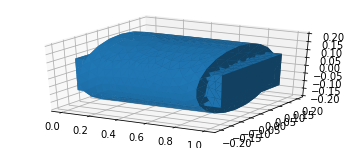

In [28]:
mesh = fen.Mesh('simple_CWDM.xml')
fen.plot(mesh)

class B_N(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(x[0], 0.0) and x[1]>-0.15 and x[1]<0.15 and x[2]>-0.1 and x[2]<0.1

g_N = fen.Expression(('1.0', '0.0', '0.0'), degree=2)
WG = CircularWaveguide(mesh, B_N, g_N=g_N)

### Solution of problem

In [27]:
WG.setup()
WG.solve(1.3)
WG.compute_solution_norm()

0.40670551813535716